In [91]:
from gensim.models import Word2Vec

size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
window: (default 5) The maximum distance between a target word and words around the target word.
min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
workers: (default 3) The number of threads to use while training.
sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [92]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

##### define training data

mary = """Mary had a little lamb
His fleece was white as snow
And everywhere that Mary went
The lamb was sure to go
Why does the lamb love Mary so
The eager children cry
Why Mary loves the lamb you know
The teacher did reply"""

sentences = [word_tokenize(s) for s in mary.lower().split('\n')]
sentences

[nltk_data] Downloading package punkt to /Users/pkadala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['mary', 'had', 'a', 'little', 'lamb'],
 ['his', 'fleece', 'was', 'white', 'as', 'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went'],
 ['the', 'lamb', 'was', 'sure', 'to', 'go'],
 ['why', 'does', 'the', 'lamb', 'love', 'mary', 'so'],
 ['the', 'eager', 'children', 'cry'],
 ['why', 'mary', 'loves', 'the', 'lamb', 'you', 'know'],
 ['the', 'teacher', 'did', 'reply']]

In [99]:
# train model
model = Word2Vec(sentences, vector_size = 100, min_count=1)

# summarize the loaded model
print(model)

Word2Vec(vocab=32, vector_size=100, alpha=0.025)


In [100]:
# summarize vocabulary
print(list(model.wv.index_to_key))

# access vector for one word
print(model.wv['mary'])
print(model.wv['everywhere'])

['the', 'lamb', 'mary', 'was', 'why', 'know', 'that', 'had', 'a', 'little', 'teacher', 'his', 'fleece', 'white', 'as', 'snow', 'and', 'everywhere', 'went', 'you', 'did', 'sure', 'to', 'go', 'does', 'love', 'so', 'eager', 'children', 'cry', 'loves', 'reply']
[ 9.6387128e-05  3.0753405e-03 -6.8158815e-03 -1.3765404e-03
  7.6704924e-03  7.3518157e-03 -3.6769798e-03  2.6391810e-03
 -8.3220862e-03  6.2075825e-03 -4.6390593e-03 -3.1616483e-03
  9.3179969e-03  8.8215159e-04  7.4906321e-03 -6.0719377e-03
  5.1680990e-03  9.9223955e-03 -8.4638726e-03 -5.1374687e-03
 -7.0684198e-03 -4.8602885e-03 -3.7778635e-03 -8.5349074e-03
  7.9617267e-03 -4.8440672e-03  8.4244618e-03  5.2665453e-03
 -6.5462519e-03  3.9636442e-03  5.4699075e-03 -7.4256859e-03
 -7.4079875e-03 -2.4770331e-03 -8.6281272e-03 -1.5788795e-03
 -4.0587521e-04  3.2935438e-03  1.4434570e-03 -8.8479236e-04
 -5.5986042e-03  1.7367953e-03 -8.9377904e-04  6.7923465e-03
  3.9770845e-03  4.5341789e-03  1.4261074e-03 -2.7009579e-03
 -4.369294

In [101]:
# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=32, vector_size=100, alpha=0.025)


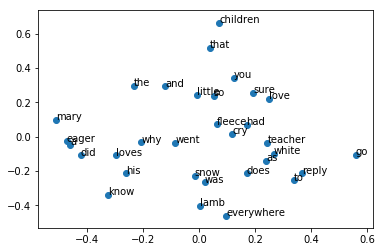

In [102]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model.wv.get_normed_vectors()
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [103]:
model.wv.most_similar('teacher')

[('fleece', 0.12813478708267212),
 ('his', 0.109392911195755),
 ('had', 0.10889007151126862),
 ('go', 0.10807981342077255),
 ('does', 0.10192397981882095),
 ('to', 0.09928765147924423),
 ('everywhere', 0.09614454954862595),
 ('you', 0.08630754798650742),
 ('the', 0.06285080313682556),
 ('that', 0.05048206076025963)]